## Scrap notebook with random functions and code just to get started on the entire NLP Process

In [68]:
#Importing necessary packages and libraries
import twint
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
#necessary packages
from nltk.tokenize import RegexpTokenizer
import re

In [70]:
#scraped CSV into dataframe
data=pd.read_csv('jeff.csv')
data.shape

(7137, 35)

In [71]:
#time period of tweets



### Scrap Work and Used code 

In [72]:
#creating word bank from tweets
BoW=[]
for word in data['tweet']:
    BoW.append(word)
len(BoW)

7137

In [73]:
#further processing of BoW into a corpus
word_bank= ' '.join(BoW)
word_bank= word_bank.lower()
word_bank

' https://twitter.com/drawandstrike/status/1279805238556397569?s=19\xa0…\n\nlet me know when blm marxist scum is marching for this little girl and the 6000+ black people murdered by other black people in the us every year. till then... #alllivesmatter racism is the idol that feeds the  beast of #blacklivesmatter\nrev 13:17\n\n#alllivesmatter or no life does. powerful picture of the real state of race relations in america. #alllivesmatter \ngod bless these heroes! ✝️🇺🇸  https://twitter.com/pasreport/status/1284219448250048513\xa0… looks like yet another black criminal dealt with in the harsh manner they deserve #alllivesmatter i saw you on the news, know the truth and your response will bring a just consequence!! i own the copyrighted sermon, where the system of matter movements/lives matter generated!\n#alllivesmatter © & #blacklivesmatter© are my sentences..hijacked, sold & prostituted! #blm© is holy! how abt u go away. there r other dr\'s that disagree. so u appear 2 have the same"go

In [74]:
#looking at sample tweet
data['tweet'][9]

'So basically you are funding the militarization of BLM and Aintifa\nTake your money out of @BankofAmerica. \n#TheGreatAwakening #TheStormIsUponUs #AllLivesMatter  https://twitter.com/BofA_News/status/1267788917660516354\xa0…'

In [75]:
#tokenizing our word bank
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= tokenizer.tokenize(word_bank)

In [76]:
#our tokens
tokenized_tweets

['https',
 'twitter',
 'com',
 'drawandstrike',
 'status',
 's',
 'let',
 'me',
 'know',
 'when',
 'blm',
 'marxist',
 'scum',
 'is',
 'marching',
 'for',
 'this',
 'little',
 'girl',
 'and',
 'the',
 'black',
 'people',
 'murdered',
 'by',
 'other',
 'black',
 'people',
 'in',
 'the',
 'us',
 'every',
 'year',
 'till',
 'then',
 'alllivesmatter',
 'racism',
 'is',
 'the',
 'idol',
 'that',
 'feeds',
 'the',
 'beast',
 'of',
 'blacklivesmatter',
 'rev',
 'alllivesmatter',
 'or',
 'no',
 'life',
 'does',
 'powerful',
 'picture',
 'of',
 'the',
 'real',
 'state',
 'of',
 'race',
 'relations',
 'in',
 'america',
 'alllivesmatter',
 'god',
 'bless',
 'these',
 'heroes',
 'https',
 'twitter',
 'com',
 'pasreport',
 'status',
 'looks',
 'like',
 'yet',
 'another',
 'black',
 'criminal',
 'dealt',
 'with',
 'in',
 'the',
 'harsh',
 'manner',
 'they',
 'deserve',
 'alllivesmatter',
 'i',
 'saw',
 'you',
 'on',
 'the',
 'news',
 'know',
 'the',
 'truth',
 'and',
 'your',
 'response',
 'will',
 

In [77]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter']
sw_set = set(sw_list)

In [78]:
#list of stopwords and punctuation
print(sw_set)

{'!', 'above', 'this', '}', 'ours', "you've", 'until', "you'd", 'shouldn', 'between', 'out', 'what', 'before', "hadn't", 'isn', '*', 'where', '©', '\\', 'been', 'that', 'or', 'but', 'mightn', 'had', 'once', 't', 'be', 'a', '`', 'all', 'd', 'it', 'hasn', 'yourself', 'now', 'mustn', 'didn', '$', 'have', 'own', 'bluelivesmatter', '“', '—', '>', '–', 'her', 'how', 'in', 'again', 'myself', '"', '^', 'each', 'than', '&', ':', '#', 'about', '%', 'do', '+', 'haven', '.', "should've", 'couldn', 'twitter', "you'll", 'can', 'my', 'll', 'then', 'aren', '-', 'you', 'our', 'https', "wouldn't", 'why', 'while', ',', 'any', 'ourselves', '/', "shouldn't", 'was', "don't", 'up', 'yourselves', 'most', 'doesn', ')', ';', 'hers', 'the', '‘', 'during', 'will', 'off', 'from', 'for', 'with', "doesn't", 'whom', "haven't", 'should', 'won', 'just', ']', 'when', 'hadn', "aren't", 'he', 'who', 'so', "''", 'few', 'am', 'because', "shan't", 'other', "didn't", 'him', '<', "you're", 'she', 'both', 'only', 'below', 'such

In [79]:
#filtering for stop words
filtered_tweets=[]
for word in tokenized_tweets:
    if word not in sw_set:
        filtered_tweets.append(word)
      

In [80]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))
print (lemmatized_tweets)

['drawandstrike', 'status', 'let', 'know', 'blm', 'marxist', 'scum', 'marching', 'little', 'girl', 'black', 'people', 'murdered', 'black', 'people', 'u', 'every', 'year', 'till', 'racism', 'idol', 'feed', 'beast', 'rev', 'life', 'powerful', 'picture', 'real', 'state', 'race', 'relation', 'america', 'god', 'bless', 'hero', 'pasreport', 'status', 'look', 'like', 'yet', 'another', 'black', 'criminal', 'dealt', 'harsh', 'manner', 'deserve', 'saw', 'news', 'know', 'truth', 'response', 'bring', 'consequence', 'copyrighted', 'sermon', 'system', 'matter', 'movement', 'life', 'matter', 'generated', 'sentence', 'hijacked', 'sold', 'prostituted', 'blm', 'holy', 'abt', 'u', 'go', 'away', 'r', 'dr', 'disagree', 'u', 'appear', 'god', 'complex', 'dr', 'doom', 'fauci', 'listen', 'else', 'ur', 'lying', 'discredit', 'w', 'statement', 'diatribe', 'make', 'political', 'full', 'racism', 'simple', 'amazing', 'people', 'able', 'see', 'hypocrisy', 'wwg', 'wga', 'trump', 'nypost', 'blm', 'co', 'founder', 'desc

In [81]:
#observing the frequency of common words in the corpus
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

status                 1908
pic                    1260
life                    969
black                   860
blm                     840
matter                  727
people                  667
trump                   650
realdonaldtrump         491
racist                  458
white                   398
police                  378
news                    353
get                     333
backtheblue             316
u                       295
maga                    269
facebook                261
america                 257
right                   254
cspanwj                 247
like                    246
say                     243
hate                    236
breakingnews            230
love                    222
savethechildren         222
want                    221
support                 221
know                    209
stop                    202
breaking                200
de                      199
racism                  189
let                     187
would               

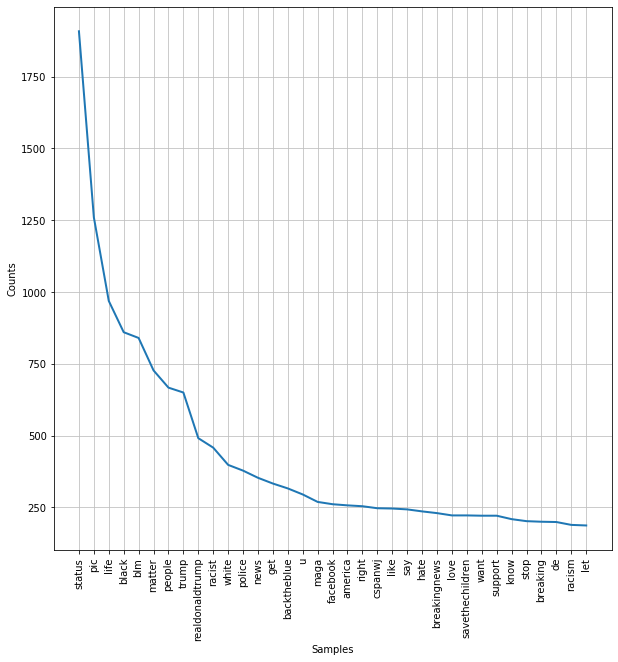

In [82]:
#observing the frequency distribution of popular words in corpus
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,10))
fdist.plot(35)

In [83]:
#vectorizing using the frequent words 
vec=CountVectorizer(stop_words=sw_set, ngram_range=(1,3))
X=vec.fit(lemmatized_tweets)
X=vec.transform(lemmatized_tweets)

In [84]:
#putting vectorized data into a dataframe
df_wordvec = pd.DataFrame(X.todense(), columns = vec.get_feature_names())
df_wordvec

,aaj,aajtak,aan,aandacht,aangeven,aaru,aau,ab,abbyjohnson,abcnews,...,zvg,zw,zwarte,zwarten,zwartepiet,zweifelhaften,zxt,zyada,zyrbhhbmw,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#a look at all of the tweets
data['tweet']

0        https://twitter.com/drawandstrike/status/1279...
1       RACISM IS THE IDOL THAT FEEDS THE  BEAST OF #b...
2       Powerful picture of the REAL state of race rel...
3       Looks like yet another black criminal dealt wi...
4       I SAW YOU ON THE NEWS, KNOW THE TRUTH AND YOUR...
                              ...                        
7132    #AllLivesMatter #BlueLivesMatter and #OurCount...
7133    @ericgarcetti  what did you expect moron? we'r...
7134    Does that mean #DementiaJoe is saying #AllLive...
7135    #PaperMario #PaperMarioTheOrigamiKing #Nintend...
7136     pic.twitter.com/Q1HTj0C8db you can sue for mi...
Name: tweet, Length: 7137, dtype: object

In [86]:
#importing the vader sentiment analysis package and instantiating it
data=data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [87]:
#wrote a function to get the vader scores fir my data
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)

In [88]:
#list comprehension using my written function
a= [analyser.polarity_scores(x) for x in data['tweet']]

In [89]:
#pulling the relevant score into a list 
b= [x.items() for x in a]

In [90]:
#creating a dataframe of my vader scores of the tweets
data1=pd.DataFrame(b, columns= ['neg', 'neu', 'pos', 'comp'])

In [91]:
b = data1['comp']

In [92]:
#making a column that grabs the right compound score to gauge sentiment
data1['comp2']= [score[1] for score in b]

In [93]:
k=data1['comp2']

In [94]:
#rounding out my vader score
data1['comp2']= data1['comp2'].round(3)

In [95]:
# THIS method WORKS FOR MAPPING!!!! 
col         = 'comp2'
conditions  = [ data1[col] >= .05, (data1[col] < .05) & (data1[col]> -.05), data1[col] <= -.05 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)            


In [96]:
data1['comp3'].value_counts()

 0.0    2802
-1.0    2277
 1.0    2058
Name: comp3, dtype: int64

In [97]:
#final mapping process
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [98]:
main_data= pd.concat([data['tweet'], data['language'], data1['comp4']], axis=1, join='outer')

In [99]:
main_data.isna().sum()


tweet       0
language    0
comp4       0
dtype: int64

In [100]:
#getting only tweets in English
Work_data= main_data[main_data['language']=='en']

In [101]:
#looking at the classes
Work_data['comp4'].value_counts()

negative    2127
positive    1917
neutral      837
Name: comp4, dtype: int64

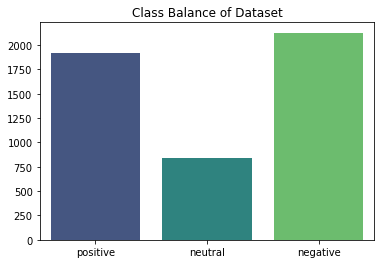

In [102]:
#graph of the classes
x=['positive', 'neutral', 'negative']
y=[Work_data['comp4'].value_counts()[1], Work_data['comp4'].value_counts()[2],
   Work_data['comp4'].value_counts()[0]]
sns.barplot(x,y, palette= 'viridis')
plt.title('Class Balance of Dataset')
plt.savefig('class_balance.png')
plt.show()


In [103]:
X= Work_data['tweet']
y= Work_data['comp4']

In [104]:
X_train, y_train, X_test, y_test= train_test_split(X, y, test_size=.20, random_state=23)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3904,)
(3904,)
(977,)
(977,)


### Constructing word clouds and word frequency bar charts

In [106]:
#created a NLP processing function that includes all the steps of corpus cleaning and creation
def NLP_process(data):
    BoW=[]
    for word in data:
        BoW.append(word)
    word_bank= ' '.join(BoW)
    word_bank= word_bank.lower()
#     from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_tweets= tokenizer.tokenize(word_bank)

    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', '.']
    sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter', 'p', 'status']
    sw_set = set(sw_list)
    filtered_tweets=[]
    for word in tokenized_tweets:
        if word not in sw_set:
            filtered_tweets.append(word)
#     
    lemmatizer=WordNetLemmatizer()
    X_lemmatized_tweets=[]
    for w in filtered_tweets:
        X_lemmatized_tweets.append(lemmatizer.lemmatize(w))
    return (X_lemmatized_tweets)
    

In [107]:
#checking if the NLP function works
z=[NLP_process(Work_data['tweet']) for x in Work_data]

In [108]:
#grouping the positive sentiment tweets together
Pos_data=Work_data[Work_data['comp4']=='positive']

In [109]:
#grouping the neutral sentiment tweets together
Neu_data=Work_data[Work_data['comp4']=='neutral']

In [110]:
#grouping the negative sentiment tweets together
Neg_data=Work_data[Work_data['comp4']=='negative']

In [111]:
#processing the pos tweets 
Pos_process_data=[NLP_process(Pos_data['tweet']) for x in Pos_data]

In [112]:
#a look at the processed data 
Pos_process_data

[['powerful',
  'picture',
  'real',
  'state',
  'race',
  'relation',
  'america',
  'god',
  'bless',
  'hero',
  'pasreport',
  'saw',
  'news',
  'know',
  'truth',
  'response',
  'bring',
  'consequence',
  'copyrighted',
  'sermon',
  'system',
  'matter',
  'movement',
  'life',
  'matter',
  'generated',
  'sentence',
  'hijacked',
  'sold',
  'prostituted',
  'blm',
  'holy',
  'god',
  'risen',
  'living',
  'king',
  'jesuschrist',
  'georgefloyd',
  'godisgood',
  'music',
  'mightytosave',
  'hope',
  'salvation',
  'jesusistheanswer',
  'faith',
  'gospelmusic',
  'worshipleader',
  'dallas',
  'worshipleader',
  'evangelism',
  'votered',
  'greatisourgod',
  'africanamerican',
  'gospelmusic',
  'trumptrain',
  'pic',
  'z',
  'fnsfcpe',
  'pray',
  'world',
  'patriot',
  'never',
  'wish',
  'bad',
  'others',
  'even',
  'good',
  'revenge',
  'show',
  'justice',
  'great',
  'might',
  'seem',
  'feel',
  'remember',
  'wwg',
  'wga',
  'humanrights',
  'crimesag

In [113]:
#processing the neutral data
Neu_process_data=[NLP_process(Neu_data['tweet']) for x in Neu_data]

In [114]:
# a look into the processed neutral data
Neu_process_data

[['basically',
  'funding',
  'militarization',
  'blm',
  'aintifa',
  'take',
  'money',
  'bankofamerica',
  'thegreatawakening',
  'thestormisuponus',
  'bofa',
  'news',
  'life',
  'matter',
  'goal',
  'blm',
  'mean',
  'end',
  'instagram',
  'cban',
  'atuq',
  'igshid',
  'lttjr',
  'xoili',
  'life',
  'matter',
  'goal',
  'blm',
  'mean',
  'end',
  'instagram',
  'cban',
  'atuq',
  'igshid',
  'xm',
  'lv',
  'yjw',
  'even',
  'unborn',
  'black',
  'life',
  'prolife',
  'nige',
  'ole',
  'chap',
  'potus',
  'wonder',
  'public',
  'response',
  'would',
  'renamed',
  'trumptower',
  'new',
  'york',
  'need',
  'removed',
  'andilephehlukwayo',
  'pose',
  'message',
  'blacklivesmatters',
  'southafrica',
  'cricketit',
  'instagram',
  'ccyc',
  'bpk',
  'j',
  'igshid',
  'nls',
  'k',
  'g',
  'math',
  'statistic',
  'dr',
  'seuss',
  'conservative',
  'environment',
  'climate',
  'change',
  'fact',
  'history',
  'differing',
  'point',
  'view',
  'anyon

In [115]:
#processing negative tweet data
Neg_process_data=[NLP_process(Neg_data['tweet']) for x in Neg_data]

In [116]:
#a look into the negative words
Neg_process_data

[['drawandstrike',
  'let',
  'know',
  'blm',
  'marxist',
  'scum',
  'marching',
  'little',
  'girl',
  'black',
  'people',
  'murdered',
  'black',
  'people',
  'u',
  'every',
  'year',
  'till',
  'racism',
  'idol',
  'feed',
  'beast',
  'rev',
  'life',
  'look',
  'like',
  'yet',
  'another',
  'black',
  'criminal',
  'dealt',
  'harsh',
  'manner',
  'deserve',
  'abt',
  'u',
  'go',
  'away',
  'r',
  'dr',
  'disagree',
  'u',
  'appear',
  'god',
  'complex',
  'dr',
  'doom',
  'fauci',
  'listen',
  'else',
  'ur',
  'lying',
  'discredit',
  'w',
  'statement',
  'diatribe',
  'make',
  'political',
  'full',
  'racism',
  'simple',
  'amazing',
  'people',
  'able',
  'see',
  'hypocrisy',
  'white',
  'people',
  'group',
  'given',
  'lower',
  'measure',
  'melanin',
  'non',
  'compassionate',
  'savage',
  'without',
  'soul',
  'correct',
  'take',
  'away',
  'islamophobia',
  'love',
  'towards',
  'animal',
  'case',
  'omnivorous',
  'actually',
  'sto

In [117]:
#making the list hashable so we can further perform our analysis on it
Pos_words = [item for sublist in Pos_process_data for item in sublist]
Neu_words = [item for sublist in Neu_process_data for item in sublist]
Neg_words = [item for sublist in Neg_process_data for item in sublist]

In [118]:
#freq dist count 
pos_words_list= FreqDist(Pos_words)

In [119]:
#freq dist count of top 25 words for pos
pos_words_list.most_common(25)

[('life', 1221),
 ('pic', 1014),
 ('matter', 942),
 ('trump', 732),
 ('black', 684),
 ('people', 657),
 ('love', 558),
 ('blm', 495),
 ('like', 420),
 ('get', 405),
 ('god', 393),
 ('white', 375),
 ('police', 369),
 ('realdonaldtrump', 336),
 ('maga', 333),
 ('u', 327),
 ('backtheblue', 309),
 ('support', 306),
 ('good', 303),
 ('want', 300),
 ('america', 297),
 ('thank', 288),
 ('know', 270),
 ('say', 267),
 ('news', 255)]

In [120]:
#freq dist count
neu_words_list=FreqDist(Neu_words)

In [121]:
#freq dist count of top 25 words for neu
neu_words_list.most_common(25)

[('pic', 492),
 ('blm', 315),
 ('life', 255),
 ('black', 255),
 ('trump', 237),
 ('realdonaldtrump', 225),
 ('matter', 213),
 ('news', 165),
 ('say', 144),
 ('maga', 141),
 ('right', 138),
 ('people', 138),
 ('get', 117),
 ('cspanwj', 108),
 ('take', 105),
 ('movement', 105),
 ('watch', 102),
 ('breakingnews', 99),
 ('teaparty', 99),
 ('instagram', 96),
 ('igshid', 96),
 ('youtu', 96),
 ('breaking', 96),
 ('u', 90),
 ('facebook', 90)]

In [122]:
#freq dist count
neg_words_list=FreqDist(Neg_words)

In [123]:
#freq dist of top 25 words in neg
neg_words_list.most_common(25)

[('black', 1578),
 ('blm', 1401),
 ('life', 1329),
 ('people', 1197),
 ('racist', 1164),
 ('pic', 1146),
 ('matter', 909),
 ('realdonaldtrump', 813),
 ('white', 735),
 ('police', 675),
 ('trump', 669),
 ('hate', 636),
 ('news', 585),
 ('terrorist', 498),
 ('stop', 483),
 ('facebook', 471),
 ('get', 471),
 ('breakingnews', 459),
 ('racism', 456),
 ('cspanwj', 456),
 ('group', 429),
 ('america', 390),
 ('u', 387),
 ('right', 369),
 ('breaking', 369)]

In [124]:
#creating the x and y for our top 25 words graph pos sentiment
pos_bar_counts = [x[1] for x in pos_words_list.most_common(25)]
pos_bar_words = [x[0] for x in pos_words_list.most_common(25)]

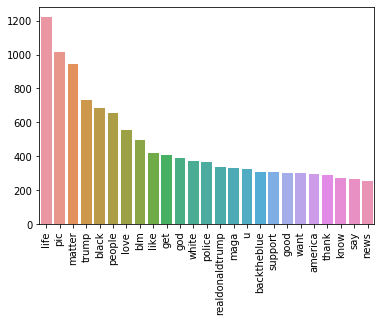

In [125]:
#plotting the graph
sns.barplot(pos_bar_words, pos_bar_counts)
plt.xticks(rotation=90)
plt.savefig('pos_wf.png')
plt.show()

In [126]:
#creating the x and y for our top 25 words graph neu sentiment
neu_bar_counts = [x[1] for x in neu_words_list.most_common(25)]
neu_bar_words = [x[0] for x in neu_words_list.most_common(25)]

<function matplotlib.pyplot.show(*args, **kw)>

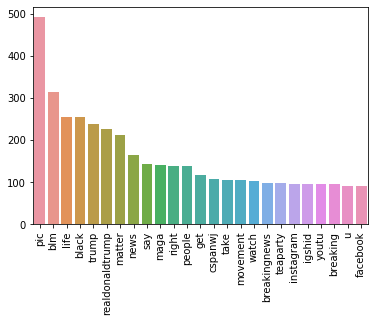

In [127]:
#plotting the graph
sns.barplot(neu_bar_words, neu_bar_counts)
plt.xticks(rotation=90)
plt.savefig('neu_wf.png')
plt.show

In [128]:
#creating the x and y for our top 25 words graph neg sentiment
neg_bar_counts = [x[1] for x in neg_words_list.most_common(25)]
neg_bar_words = [x[0] for x in neg_words_list.most_common(25)]

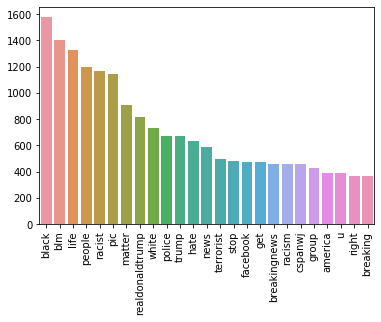

In [129]:
#plotting the graph 
sns.barplot(neg_bar_words, neg_bar_counts)
plt.xticks(rotation=90)
plt.savefig('neg_wf.png')
plt.show()

In [130]:
#importing wordcloud and making the dictionary for pos, neu, neg
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_bar_words, pos_bar_counts))
neu_dictionary = dict(zip(neu_bar_words, neu_bar_counts))
neg_dictionary = dict(zip(neg_bar_words, neg_bar_counts))

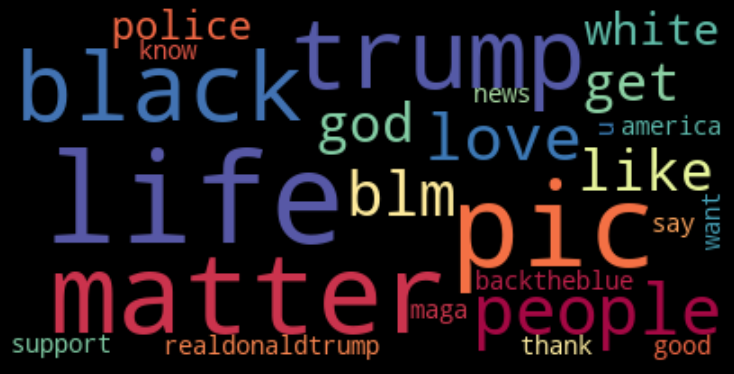

In [131]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

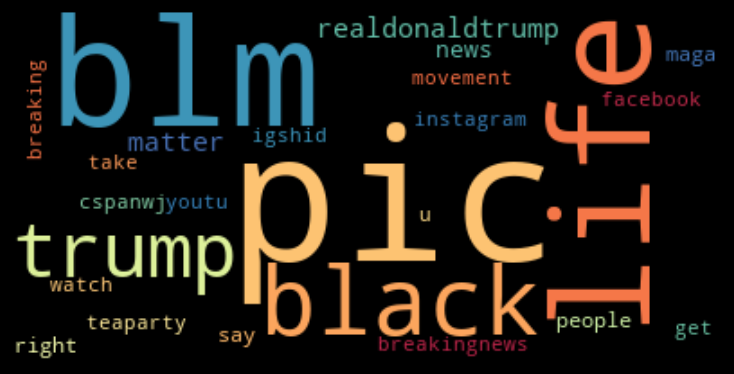

In [132]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neu_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

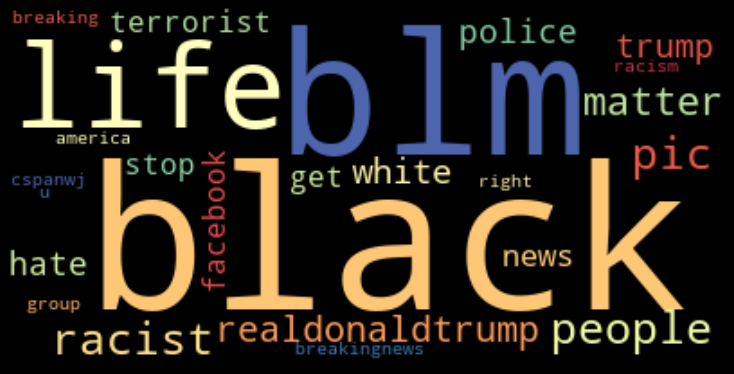

In [133]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()